In [11]:
import os
path = '/content/bird'

f_list = os.listdir(path)
f_list = [file for file in f_list if file.endswith('.csv')]
f_list = natsort.natsorted(f_list) # 파일명 숫자순 정렬
f_list.reverse()
f_list # 리스트 확인

['bird_5.csv', 'bird_4.csv', 'bird_3.csv', 'bird_2.csv', 'bird_1.csv']

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

import natsort
from copy import deepcopy
import numpy as np
!apt-get update -qq



df = pd.DataFrame()
count=False
for i in f_list: # csv 파일 리스트
  data = pd.read_csv(path+'/'+i,encoding='utf-8',thousands=',' )
  data=data.drop(columns=['평균'])
  if count :
    data=data.drop(columns='구분')
  data=data.drop(0) # 관할 지역 행 삭제
  df=pd.concat([df,data],axis=1)
  count = True

df2=df.transpose()

labels = df.columns[1:26]
sum_list=list(df2[1][1:26])


#df2 = deepcopy(df[0:1])
#df2=df2.transpose()

#df2.head()

#bird_csv= pd.concat([csv5,csv4,csv3])
#bird_csv.head()


# **(2018~2022) Bird_Sum_Year/Month**

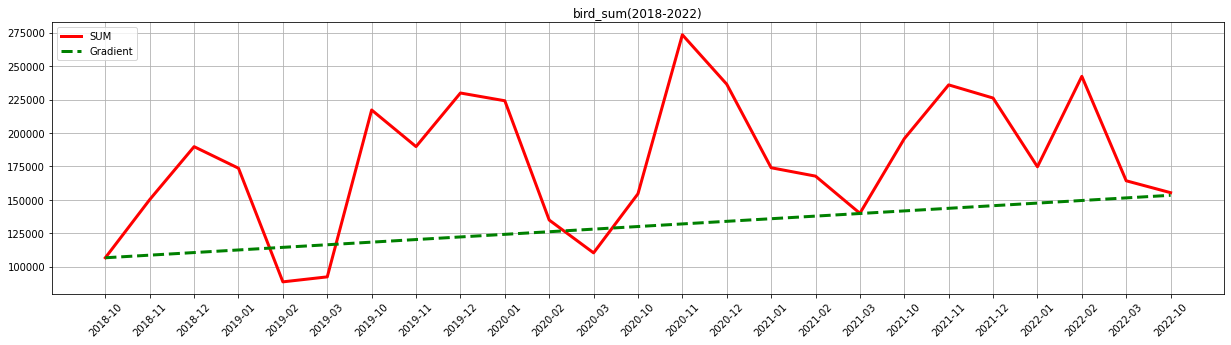

In [12]:

plt.figure(figsize=(21,5));line = plt.plot(labels,sum_list)
plt.xticks( rotation=45)
plt.grid()
plt.title('bird_sum(2018-2022)')



gradient = sum_list[24]/sum_list[0]
dif = sum_list[24]-sum_list[0]
dif =dif /25
y_valuese = [106664]
for i in range(24):
    y_valuese.append(y_valuese[-1]+dif)

plt.setp(line,color='r',linewidth=3.0)
y = plt.plot(labels,y_valuese,'--')
plt.setp(y,color='g',linewidth=3.0)
plt.legend(labels=['SUM','Gradient'],loc='upper left')

# **Bird_Sum_Prediction**

In [13]:
from prophet import Prophet

In [14]:
new_set = {'ds': labels,
           'y' : sum_list }

new_df = pd.DataFrame(new_set)
# new_df['ds']=pd.to_datetime(new_df['ds'])

# 모델델 생성

model = Prophet(weekly_seasonality=False,daily_seasonality=False,changepoint_prior_scale=0.15)
#model= Prophet()
model.fit(new_df)

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7mla2jkm/jp353qsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7mla2jkm/6q159jcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72122', 'data', 'file=/tmp/tmp7mla2jkm/jp353qsc.json', 'init=/tmp/tmp7mla2jkm/6q159jcu.json', 'output', 'file=/tmp/tmp7mla2jkm/prophet_modelw8iuamxh/prophet_model-20221026085012.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:50:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Oct Prediction(2018~2024)**

In [15]:
month10=['2018-10','2019-10','2020-10','2021-10','2022-10','2023-10','2024-10']
a={ 'ds': month10}
m10=pd.DataFrame(a)


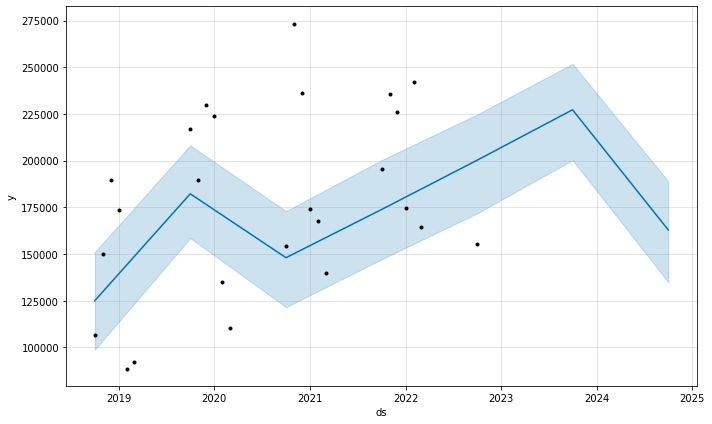

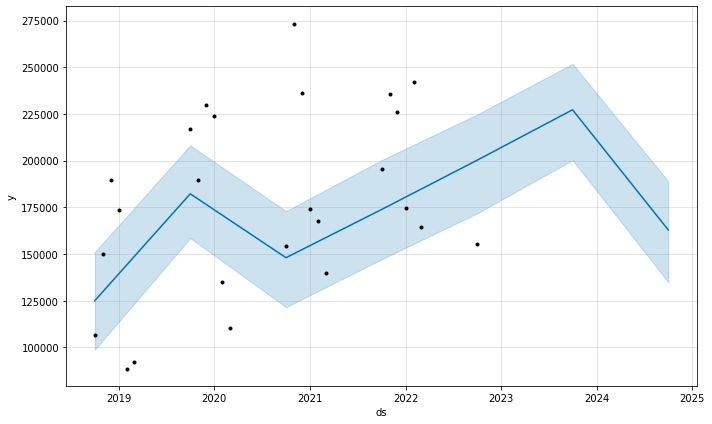

In [16]:
forecast_10=model.predict(m10)
model.plot(forecast_10)

**Sep Prediction(2018~2024)**

In [17]:
month=['2018-11','2019-11','2020-11','2021-11','2022-11','2023-11','2024-11']
a={ 'ds': month}
m=pd.DataFrame(a)

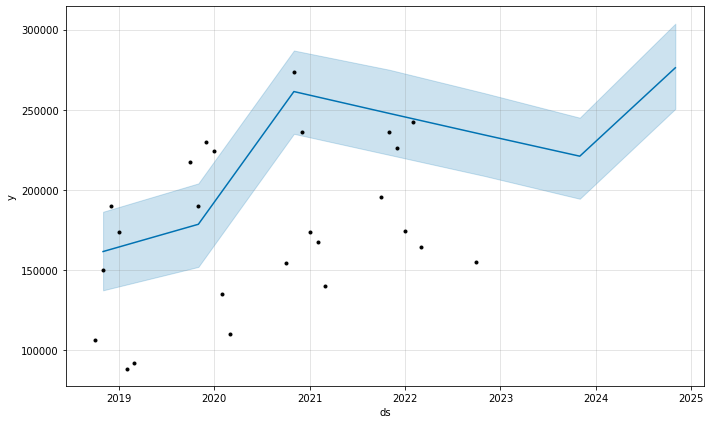

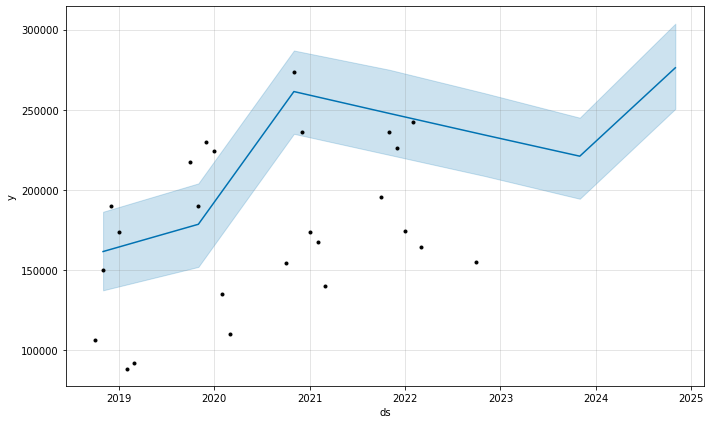

In [18]:
forecast=model.predict(m)
model.plot(forecast)

**Dec Prediction(2018~2024)**

In [19]:
month=['2018-12','2019-12','2020-12','2021-12','2022-12','2023-12','2024-12']
a={ 'ds': month}
m=pd.DataFrame(a)

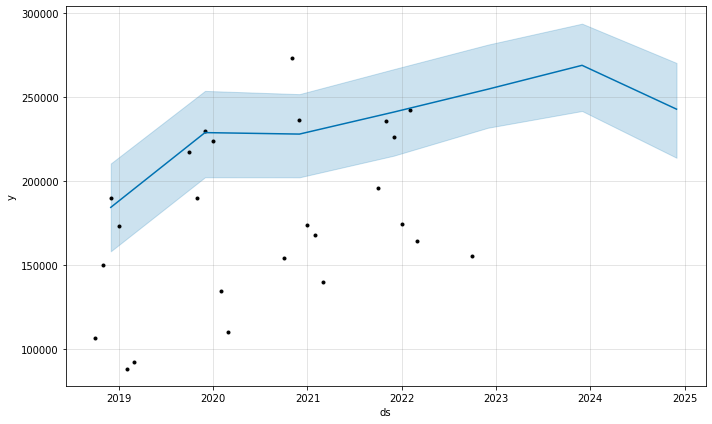

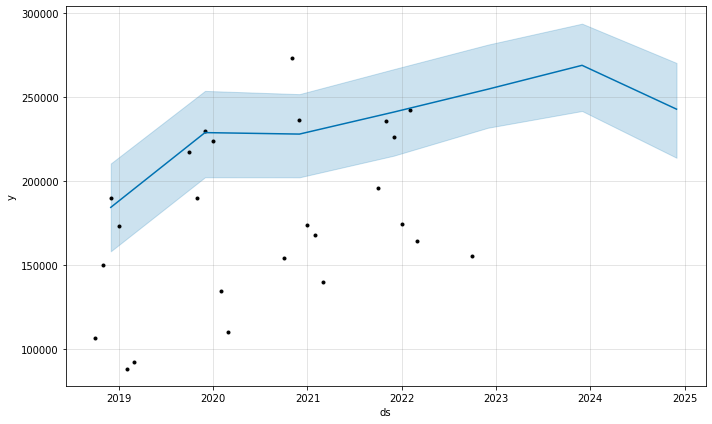

In [20]:
forecast=model.predict(m)
model.plot(forecast)

**Jan Prediction(2018~2025)**

In [21]:
month=['2018-01','2019-01','2020-01','2021-01','2022-01','2023-01','2024-01','2025-01']
a={ 'ds': month}
m=pd.DataFrame(a)

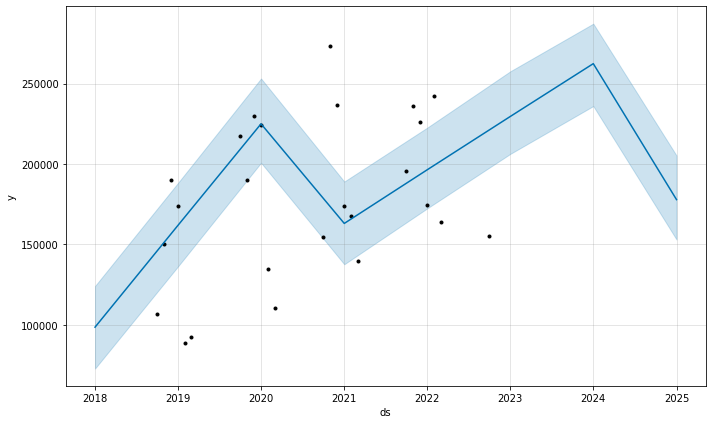

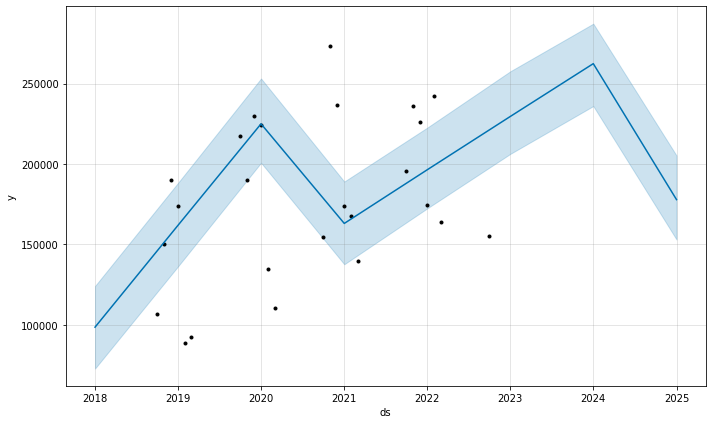

In [22]:
forecast=model.predict(m)
model.plot(forecast)

**Feb Prediction(2018~2025)**

In [23]:
month=['2018-02','2019-02','2020-02','2021-02','2022-02','2023-02','2024-02','2025-03']
a={ 'ds': month}
m=pd.DataFrame(a)

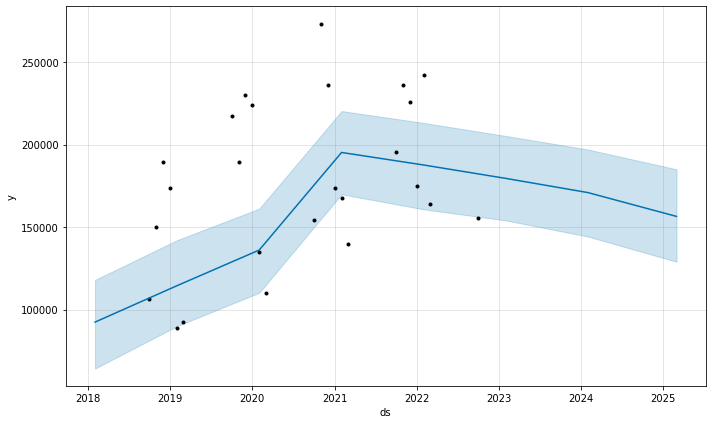

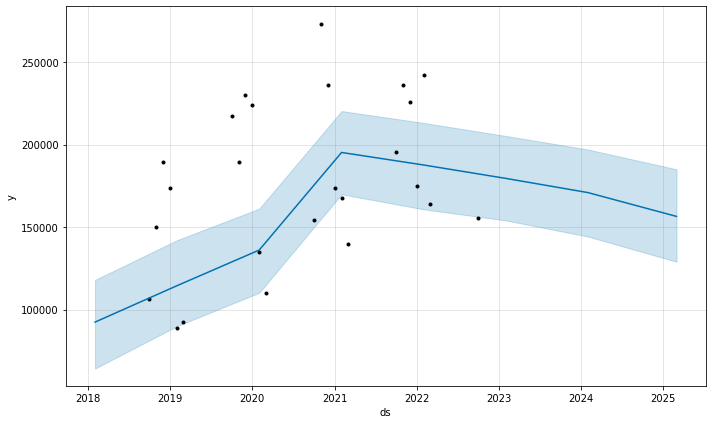

In [24]:
forecast=model.predict(m)
model.plot(forecast)

**Mar Prediction(2018~2025)**

In [79]:
month=['2018-03','2019-03','2020-03','2021-03','2022-03','2023-03','2024-03','2025-03']
a={ 'ds': month}
m=pd.DataFrame(a)



,ds,y


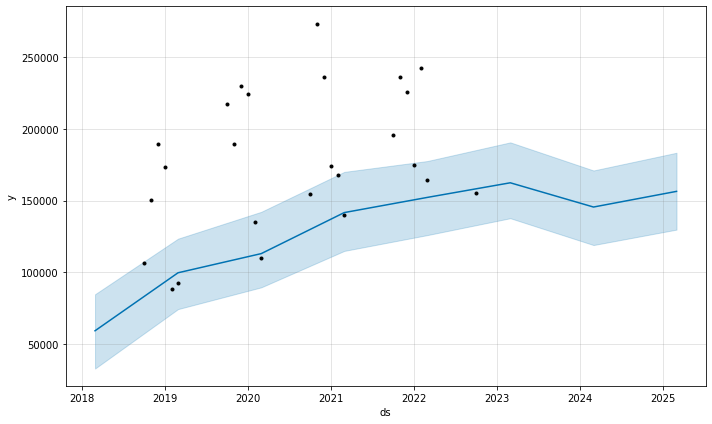

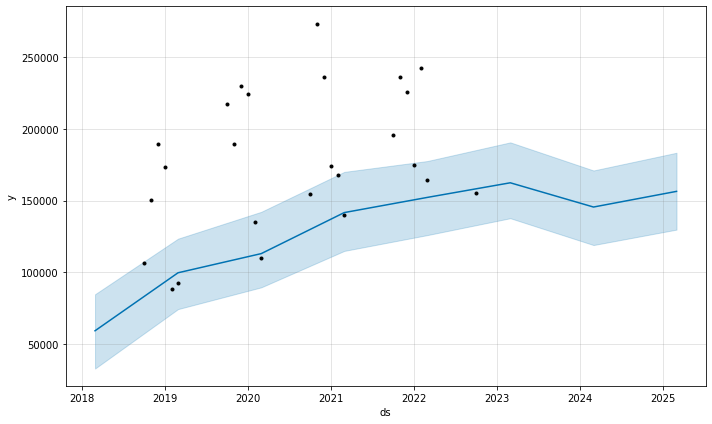

In [71]:
forecast=model.predict(m)
model.plot(forecast)


# 적정 이동시기에 개체수가 증가하는 걸로 보아, 시기가 늦혀짐을 짐작해볼 수 있다.

# **Prophet Performance Indicator**

In [99]:
df_p={'ds': labels}
df_p = pd.DataFrame(df_p)
forecast_p = model.predict(df_p)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "Appliances"
pred2 = forecast_p["yhat"]
test2 = new_df['y']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**2)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 15245.80809764171
MSE : 412280775.576223
RMSE : 1.6997543790973197e+17
MAPE : 0.0911396685790891
